In [1]:
import math

import matplotlib.pyplot as plt
import torch
from   torch import nn, optim
import torch.nn.functional as F
from   torch.utils.data import DataLoader, TensorDataset
from   torchvision import datasets, transforms

In [2]:
W = torch.randn(256, 4) / math.sqrt(256)
W.requires_grad_()

tensor([[ 0.0996,  0.0019,  0.0712, -0.0810],
        [-0.0718, -0.0009, -0.0329, -0.0455],
        [ 0.0598, -0.0455,  0.0094, -0.0337],
        ...,
        [ 0.1503, -0.0157,  0.0082, -0.0497],
        [ 0.0816,  0.0203,  0.0449,  0.0351],
        [ 0.0215,  0.0410,  0.0201, -0.0505]], requires_grad=True)

In [3]:
b = torch.zeros(4, requires_grad=True)

In [4]:
loss_func = F.cross_entropy
# loss = loss_func(mod(X), y)

In [5]:
#opt = optim.SGD(mod.parameter(), lr=ETA)

In [6]:
'''
with torch.no_grad():
    for param in mod.parameters:
        param -= param.grad * ETA # grad desc step
    mod.zero_grad()
'''

# Equivalent to:
'''
opt.step()
opt.zero_grad()
'''

'\nopt.step()\nopt.zero_grad()\n'

In [7]:
'''
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batc_size=BATCH)
'''

# now instead of manually iterating through data like:
'''
for i in range((n - 1) // bs + 1):
    X_batch = X_train[start:end]
    y_batch = y_train[start:end]
    preds = mod(X_batch)
'''

# ...can simplify to
'''
for X_batch, y_batch in train_dataloader:
    preds = mod(X_batch)
'''

'\nfor X_batch, y_batch in train_dataloader:\n    preds = mod(X_batch)\n'

In [8]:
points = torch.tensor([1., 4., 2., 1., 3., 5.])
points[0]

tensor(1.)

In [9]:
float(points[0])

1.0

In [10]:
points.shape

torch.Size([6])

In [11]:
points = torch.tensor([[1., 4.], [2., 1.], [3., 5.]])
points.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

In [12]:
points.shape, points.size()

(torch.Size([3, 2]), torch.Size([3, 2]))

In [13]:
points.storage_offset() # index of 1st elem

0

In [14]:
points[1].storage_offset()

2

In [15]:
points.stride() 

(2, 1)

In [16]:
points = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float32)

In [17]:
points = torch.tensor(
    [[1., 2.], [3., 4.]], dtype=torch.float32, device='cpu')

In [18]:
#points2 = points.to(device='cuda')
#points3 = points.to(device='cuda:0')

In [27]:
# CNN for MNIST
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.1)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(12 * 12 * 32, 64)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op

In [35]:
def train(mod, device, train_dataloader, optim, epoch):
    mod.train()
    for i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = mod(X)
        loss = F.nll_loss(pred_prob, y) # negative log likelihood
        loss.backward()
        optim.step()
        if i % 100 == 0:
            print(f'epoch: {epoch} '
                  f'[{i * len(X)}/{len(train_dataloader.dataset)} '
                  f'({100. * i / len(train_dataloader):.2f}%)]\t'
                  f'training loss: {loss.item():.6f}')

In [37]:
def test(mod, device, test_dataloader):
    mod.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = mod(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()
            pred = pred_prob.argmax(dim=1, keepdim=True)
            success += pred.eq(y.view_as(pred)).sum().item()
    n = len(test_dataloader.dataset)
    loss /= n
    print(f'\nTest dataset: Overall loss: {loss:.4f}, Overall Accuracy: '
          f'{success}/{n} ({100*success / n:.2f}%)')

In [22]:
DATA = '../../../data'

In [23]:
NORM_MEAN = 0.1302 # train_X.mean() / 256.
NORM_SD = 0.3069 # train_X.std() / 256.
BATCH = 32

In [24]:
train_dataloader = DataLoader(
    datasets.MNIST(
        DATA, 
        train=True, 
        download=True, 
        transform=transforms.Compose([
            transforms.ToTensor(), 
            transforms.Normalize((NORM_MEAN,), (NORM_SD,))])
    ),
    batch_size = BATCH,
    shuffle=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [25]:
test_dataloader = DataLoader(
    datasets.MNIST(
        DATA, 
        train=False, 
        transform=transforms.Compose([
            transforms.ToTensor(), 
            transforms.Normalize((NORM_MEAN,), (NORM_SD,))])), 
    batch_size=500, 
    shuffle=False)

In [29]:
ETA = 0.5

torch.manual_seed(12)
device = torch.device('cpu')
mod = ConvNet()
optimizer = optim.Adadelta(mod.parameters(), lr=ETA)

In [38]:
EPOCHS = 3

for epoch in range(EPOCHS):
    train(mod, device, train_dataloader, optimizer, epoch + 1)
    test(mod, device, test_dataloader)

epoch: 1 [0/60000 (0.00%)]	training loss: 0.006676
epoch: 1 [3200/60000 (5.33%)]	training loss: 0.007547
epoch: 1 [6400/60000 (10.67%)]	training loss: 0.000716
epoch: 1 [9600/60000 (16.00%)]	training loss: 0.077181
epoch: 1 [12800/60000 (21.33%)]	training loss: 0.081991
epoch: 1 [16000/60000 (26.67%)]	training loss: 0.006599
epoch: 1 [19200/60000 (32.00%)]	training loss: 0.018050
epoch: 1 [22400/60000 (37.33%)]	training loss: 0.009418
epoch: 1 [25600/60000 (42.67%)]	training loss: 0.013696
epoch: 1 [28800/60000 (48.00%)]	training loss: 0.017187
epoch: 1 [32000/60000 (53.33%)]	training loss: 0.310076
epoch: 1 [35200/60000 (58.67%)]	training loss: 0.053935
epoch: 1 [38400/60000 (64.00%)]	training loss: 0.018249
epoch: 1 [41600/60000 (69.33%)]	training loss: 0.001208
epoch: 1 [44800/60000 (74.67%)]	training loss: 0.014268
epoch: 1 [48000/60000 (80.00%)]	training loss: 0.011329
epoch: 1 [51200/60000 (85.33%)]	training loss: 0.017879
epoch: 1 [54400/60000 (90.67%)]	training loss: 0.114314
e

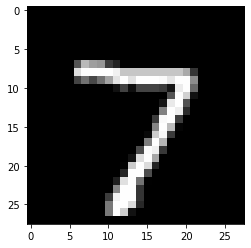

In [41]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)
plt.imshow(sample_data[0][0], cmap='gray', interpolation='none');

In [45]:
for i in range(10):
    print(f'Pred: {mod(sample_data).data.max(1)[1][i]}', end=', ')
    print(f'Actual: {sample_targets[i]}')

Pred: 7, Actual: 7
Pred: 2, Actual: 2
Pred: 1, Actual: 1
Pred: 0, Actual: 0
Pred: 4, Actual: 4
Pred: 1, Actual: 1
Pred: 4, Actual: 4
Pred: 9, Actual: 9
Pred: 5, Actual: 5
Pred: 9, Actual: 9
